<a href="https://colab.research.google.com/github/Joemagnan/Complete-Python-3-Bootcamp/blob/master/ML_MINST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8453 - loss: 0.5515 - val_accuracy: 0.9647 - val_loss: 0.1211
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9613 - loss: 0.1323 - val_accuracy: 0.9732 - val_loss: 0.0996
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9760 - loss: 0.0821 - val_accuracy: 0.9732 - val_loss: 0.0870
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9824 - loss: 0.0591 - val_accuracy: 0.9772 - val_loss: 0.0831
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9871 - loss: 0.0465 - val_accuracy: 0.9747 - val_loss: 0.1063
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9674 - loss: 0.1030
Précision sur le test set : 0.97


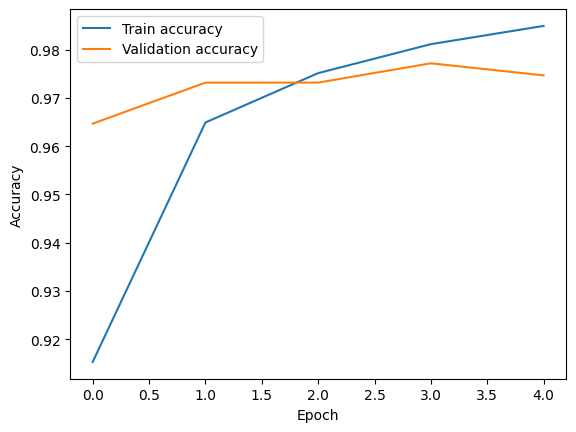

In [1]:
# II EXERCICE PRATIQUE:Construction d'un ANN pour classer les chiffres du dataset MNIST

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# 1. Chargement et prétraitement des données
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalisation
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 2. Définition du  modèle
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 3. Compilons maintenant le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Entraînement du modèle
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# 5. Évaluons le modèle
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Précision sur le test set : {test_acc:.2f}")

# 6. Visualisation des courbes
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
